In [16]:
% matplotlib inline
import importlib
import sys
import numpy as np
import scipy as sp
import matplotlib as mlp
import matplotlib.pyplot as plt

import PyNeuroData as pnd
import PyNeuroAna  as pna
import PyNeuroPlot as pnp
import store_hdf5
import df_ana
import misc_tools

# Load Data from hdf5 file

In [5]:
# set path to data
path_to_hdf5_data = '../../support_data/data_neuro_Thor_U16_all.hdf5'

In [11]:
# shwo data file stucture
store_hdf5.ShowH5(path_to_hdf5_data)

    (Group)
| 180224    (Group)
| | srv_mask    (Group)
| | | lfp    (Group)
| | | | data    (1920, 813, 16)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | | spk    (Group)
| | | | data    (1920, 813, 7)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)
| 180317    (Group)
| | matchnot    (Group)
| | | lfp    (Group)
| | | | data    (480, 813, 16)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | | spk    (Group)
| | | | data    (480, 813, 11)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | srv_mask    (Group)
| | | lfp    (Group)
| | | | data    (2400, 813, 16)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | | spk    (Group)
| | | | data    (2400, 813, 11)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)
| 180325    (Group)
| | matchnot    (Group)
| | | lfp    (Group)
| | | | data    (359, 813, 16)
| | | | trial_info    (Group)
| | |

| 180624    (Group)
| | matchnot    (Group)
| | | lfp    (Group)
| | | | data    (959, 813, 16)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | | spk    (Group)
| | | | data    (959, 813, 11)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | srv_mask    (Group)
| | | lfp    (Group)
| | | | data    (2400, 813, 16)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)
| | | spk    (Group)
| | | | data    (2400, 813, 11)
| | | | signal_info    (Group)
| | | | trial_info    (Group)
| | | | ts    (813,)


In [15]:
# load data from one day
data_neuro_spk = store_hdf5.LoadFromH5(path_to_hdf5_data, ['180624', 'srv_mask', 'spk'])
data_neuro_lfp = store_hdf5.LoadFromH5(path_to_hdf5_data, ['180624', 'srv_mask', 'lfp'])

# Some Plots
## Summary Plot

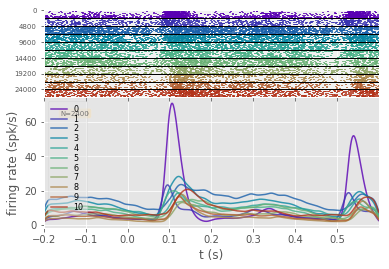

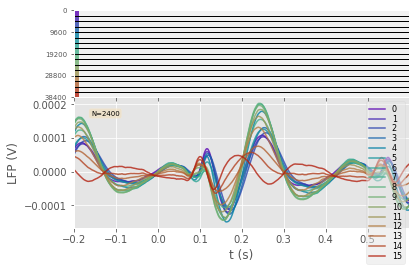

In [20]:
pnp.DataNeuroSummaryPlot(data_neuro_spk, tf_legend=True)
plt.figure()
pnp.DataNeuroSummaryPlot(data_neuro_lfp, tf_legend=True)

(<matplotlib.figure.Figure at 0x7f47f047b2b0>,
 {0: <matplotlib.axes._subplots.AxesSubplot at 0x7f47f04a3198>,
  1: <matplotlib.axes._subplots.AxesSubplot at 0x7f47eb9fb2b0>})

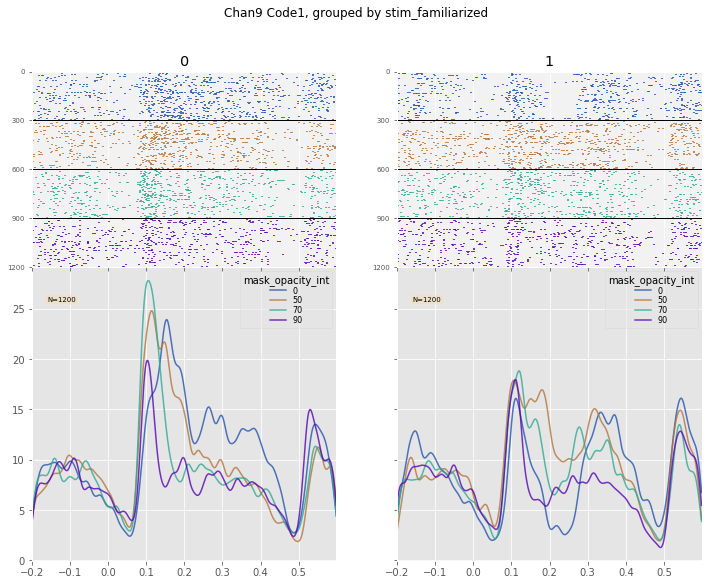

In [38]:
# one channel of spk
pnp.PsthPlotMultiPanel(data_neuro_spk, index_signal=5, sk_std=0.01, 
                       groupby_subplots='stim_familiarized', groupby_panel='mask_opacity_int')

(<matplotlib.figure.Figure at 0x7f47f040eac8>,
 {0: <matplotlib.axes._subplots.AxesSubplot at 0x7f47eb731d68>,
  1: <matplotlib.axes._subplots.AxesSubplot at 0x7f47eb8ef5f8>})

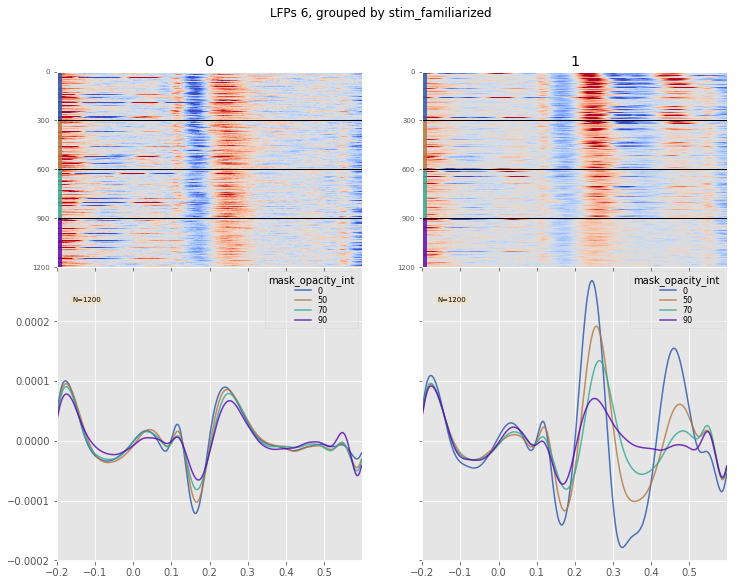

In [39]:
# one channel of lfp
pnp.PsthPlotMultiPanel(data_neuro_lfp, index_signal=5, sk_std=0.01, 
                       groupby_subplots='stim_familiarized', groupby_panel='mask_opacity_int')

## get grouped psth

In [80]:
importlib.reload(pnd)
importlib.reload(df_ana)
df_ana.GroupDataNeuro(data_neuro_spk, limit=data_neuro_spk['trial_info']['mask_opacity_int']<80,
              groupby=['stim_familiarized', 'mask_opacity_int'])

temp = pna.GroupStat(data_neuro_spk)
print(data_neuro_spk.keys())
temp.shape

{'idx': {(0, 0): array([   7,   11,   30,   33,   39,   46,   52,   71,   85,   89,   99,
        103,  128,  137,  143,  145,  172,  174,  183,  189,  190,  196,
        210,  216,  218,  234,  236,  244,  249,  264,  269,  294,  299,
        302,  307,  312,  314,  320,  325,  332,  335,  340,  356,  357,
        366,  372,  386,  392,  395,  402,  412,  434,  451,  454,  491,
        492,  496,  499,  516,  535,  565,  568,  573,  574,  583,  588,
        604,  605,  609,  610,  612,  622,  630,  631,  638,  649,  656,
        659,  665,  673,  676,  686,  695,  700,  706,  719,  720,  722,
        728,  734,  754,  759,  761,  774,  775,  776,  781,  787,  794,
        798,  801,  819,  824,  828,  833,  842,  846,  852,  863,  864,
        898,  911,  914,  917,  923,  925,  948,  954,  961,  967,  969,
        979,  994, 1009, 1024, 1037, 1042, 1051, 1061, 1064, 1084, 1087,
       1095, 1098, 1101, 1120, 1125, 1130, 1134, 1150, 1155, 1160, 1161,
       1169, 1170, 1175, 1176, 118

(6, 813, 11)

(0, 0)